## Basic DataFrame

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

In [1]:
import  pandas as pd
import numpy as np

### `Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [15]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
# i
df = pd.DataFrame(data, index=labels,)
df
# ii. Display basic information about the dataFrame.
df.head()
df.tail()
df.sample()
print(df.index)
print(df.values)
print(df.size)
print(df.describe())
print(df.isnull().sum())
print(df.shape)

# iii. Show Alternate rows of the dataframe.
print(df[::2])

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k'], dtype='object')
[['Cranes' 3.5 2 'yes']
 ['Cranes' 4.0 4 'yes']
 ['plovers' 1.5 3 'no']
 ['spoonbills' nan 4 nan]
 ['spoonbills' 6.0 3 'no']
 ['Cranes' 3.0 4 'no']
 ['plovers' 5.5 2 'no']
 ['Cranes' nan 2 'yes']
 ['spoonbills' 8.0 3 'no']
 ['spoonbills' 4.0 2 'no']
 ['Cranes' 3.5 2 'yes']]
44
            age     visits
count  9.000000  11.000000
mean   4.333333   2.818182
std    1.903943   0.873863
min    1.500000   2.000000
25%    3.500000   2.000000
50%    4.000000   3.000000
75%    5.500000   3.500000
max    8.000000   4.000000
birds       0
age         2
visits      0
priority    1
dtype: int64
(11, 4)
        birds  age  visits priority
a      Cranes  3.5       2      yes
c     plovers  1.5       3       no
e  spoonbills  6.0       3       no
g     plovers  5.5       2       no
i  spoonbills  8.0       3       no
k      Cranes  3.5       2      yes


### `Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [18]:
# i
df.iloc[[0,2,6]]
# ii
df[df['visits']<4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


### `Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [21]:
# i
df[['age','visits']].isnull().sum()

age       2
visits    0
dtype: int64

In [32]:
df =df.infer_objects(copy=False)
df['visits'] = df['visits'].interpolate(method='linear')
df['priority'] = df['priority'].interpolate(method='linear')

,birds,age,visits,priority
a,Cranes,3.50,2,yes
b,Cranes,4.00,4,yes
c,plovers,1.50,3,no
d,spoonbills,3.75,4,NaN
e,spoonbills,6.00,3,no
f,Cranes,3.00,4,no
g,plovers,5.50,2,no
h,Cranes,6.75,2,yes
i,spoonbills,8.00,3,no
j,spoonbills,4.00,2,no


### `Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [41]:
df[df['birds']=='Cranes'].sum()
df['birds'].unique()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df

,birds,age,visits,priority
a,Cranes,3.50,2,yes
b,Cranes,4.00,4,yes
c,plovers,1.50,3,no
d,spoonbills,3.75,4,NaN
e,spoonbills,6.00,3,no
f,Cranes,3.00,4,no
g,plovers,5.50,2,no
h,Cranes,6.75,2,yes
i,spoonbills,8.00,3,no
j,spoonbills,4.00,2,no


### `Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [44]:
ipl = pd.read_csv('../datasets/IPL_Matches_2008_2022.csv')

ipl.sample(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
151,1216498,NaN,2020-10-24,2020/21,43,Kings XI Punjab,Sunrisers Hyderabad,Dubai International Cricket Stadium,Sunrisers Hyderabad,field,N,Kings XI Punjab,Runs,12.0,NaN,CJ Jordan,"['KL Rahul', 'Mandeep Singh', 'CH Gayle', 'N Pooran', 'GJ Maxwell', 'DJ Hooda', 'CJ Jordan', 'M Ashwin', 'Ravi Bishnoi', 'Mohammed Shami', 'Arshdeep Singh']","['DA Warner', 'JM Bairstow', 'MK Pandey', 'Abdul Samad', 'V Shankar', 'JO Holder', 'PK Garg', 'Rashid Khan', 'Sandeep Sharma', 'T Natarajan', 'KK Ahmed']",AY Dandekar,PR Reiffel
7,1304113,Mumbai,2022-05-19,2022,67,Gujarat Titans,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Gujarat Titans,bat,N,Royal Challengers Bangalore,Wickets,8.0,NaN,V Kohli,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'R Tewatia', 'Rashid Khan', 'R Sai Kishore', 'LH Ferguson', 'Yash Dayal', 'Mohammed Shami']","['V Kohli', 'F du Plessis', 'GJ Maxwell', 'KD Karthik', 'RM Patidar', 'MK Lomror', 'Shahbaz Ahmed', 'HV Patel', 'PWH de Silva', 'JR Hazlewood', 'S Kaul']",KN Ananthapadmanabhan,GR Sadashiv Iyer


In [52]:
updated_city={

'Delhi Capitals': 'Delhi Daredevils',
'Punjab Kings' : 'Kings XI Punjab',
'Rising Pune Supergiant': 'Rising Pune Supergiants'
}
ipl['City'].rename(updated_city,axis='rows',inplace=True)
ipl.sample(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
402,980961,Rajkot,2016-05-03,2016,31,Gujarat Lions,Delhi Daredevils,Saurashtra Cricket Association Stadium,Delhi Daredevils,field,N,Delhi Daredevils,Wickets,8.0,NaN,RR Pant,"['DR Smith', 'BB McCullum', 'AJ Finch', 'SK Raina', 'KD Karthik', 'RA Jadeja', 'JP Faulkner', 'Ishan Kishan', 'P Kumar', 'DS Kulkarni', 'S Kaushik']","['Q de Kock', 'RR Pant', 'SV Samson', 'JP Duminy', 'KK Nair', 'SW Billings', 'CH Morris', 'A Mishra', 'Mohammed Shami', 'Z Khan', 'S Nadeem']",CB Gaffaney,BNJ Oxenford
776,419164,Mumbai,2010-04-24,2009/10,3rd Place Play-Off,Royal Challengers Bangalore,Deccan Chargers,Dr DY Patil Sports Academy,Deccan Chargers,bat,N,Royal Challengers Bangalore,Wickets,9.0,NaN,A Kumble,"['JH Kallis', 'R Dravid', 'KP Pietersen', 'RV Uthappa', 'V Kohli', 'CL White', 'B Akhil', 'P Kumar', 'A Kumble', 'ND Doshi', 'DW Steyn']","['AC Gilchrist', 'MD Mishra', 'Anirudh Singh', 'RG Sharma', 'A Symonds', 'DR Smith', 'Y Venugopal Rao', 'RJ Harris', 'R Sharma', 'Harmeet Singh', 'PP Ojha']",RE Koertzen,SJA Taufel


### `Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


<Axes: >

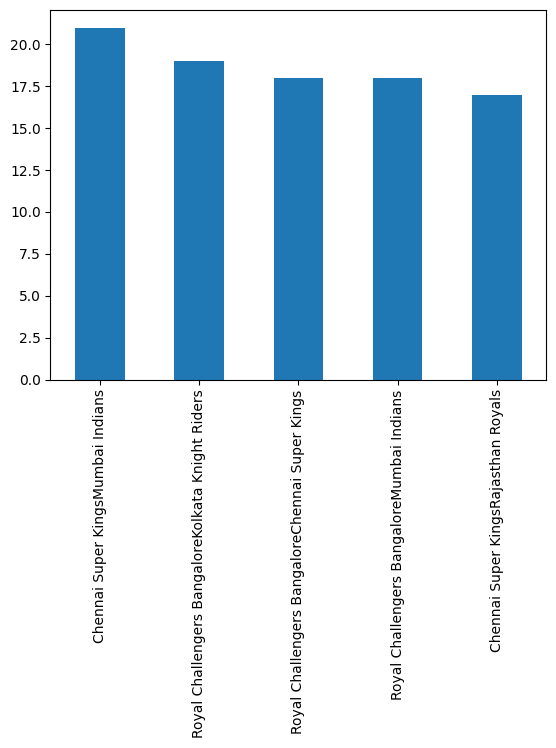

In [59]:
(ipl['Team1']+ipl['Team2']).value_counts().sort_values(ascending=False).head().plot(kind='bar')

### `Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [73]:
m1 =(ipl['Team1']=='Mumbai Indians')| (ipl['Team2']=='Mumbai Indians')
m2 = ipl.WinningTeam != 'Mumbai Indians'
ipl[m1&m2].Player_of_Match.value_counts().head(1)

Player_of_Match
KL Rahul    4
Name: count, dtype: int64